In [612]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [613]:
data = pd.read_csv('csv_result-messidor_features.csv')

In [614]:
data.head()

,id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,Class
0,1,1,1,22,22,22,19,18,14,49.895756,...,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,2,1,1,24,24,22,18,16,13,57.709936,...,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,3,1,1,62,60,59,54,47,33,55.831441,...,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,4,1,1,55,53,53,50,43,31,40.467228,...,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,5,1,1,44,44,44,41,39,27,18.026254,...,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


In [615]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1151 non-null   int64  
 1   0       1151 non-null   int64  
 2   1       1151 non-null   int64  
 3   2       1151 non-null   int64  
 4   3       1151 non-null   int64  
 5   4       1151 non-null   int64  
 6   5       1151 non-null   int64  
 7   6       1151 non-null   int64  
 8   7       1151 non-null   int64  
 9   8       1151 non-null   float64
 10  9       1151 non-null   float64
 11  10      1151 non-null   float64
 12  11      1151 non-null   float64
 13  12      1151 non-null   float64
 14  13      1151 non-null   float64
 15  14      1151 non-null   float64
 16  15      1151 non-null   float64
 17  16      1151 non-null   float64
 18  17      1151 non-null   float64
 19  18      1151 non-null   int64  
 20  Class   1151 non-null   int64  
dtypes: float64(10), int64(11)
memory usag

In [616]:
data.shape

(1151, 21)

In [617]:
data.duplicated().sum()

0

In [618]:
data.set_index('id', inplace=True)

In [619]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229,0.530843
std,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624,0.499265
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000,1.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,1.921648,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


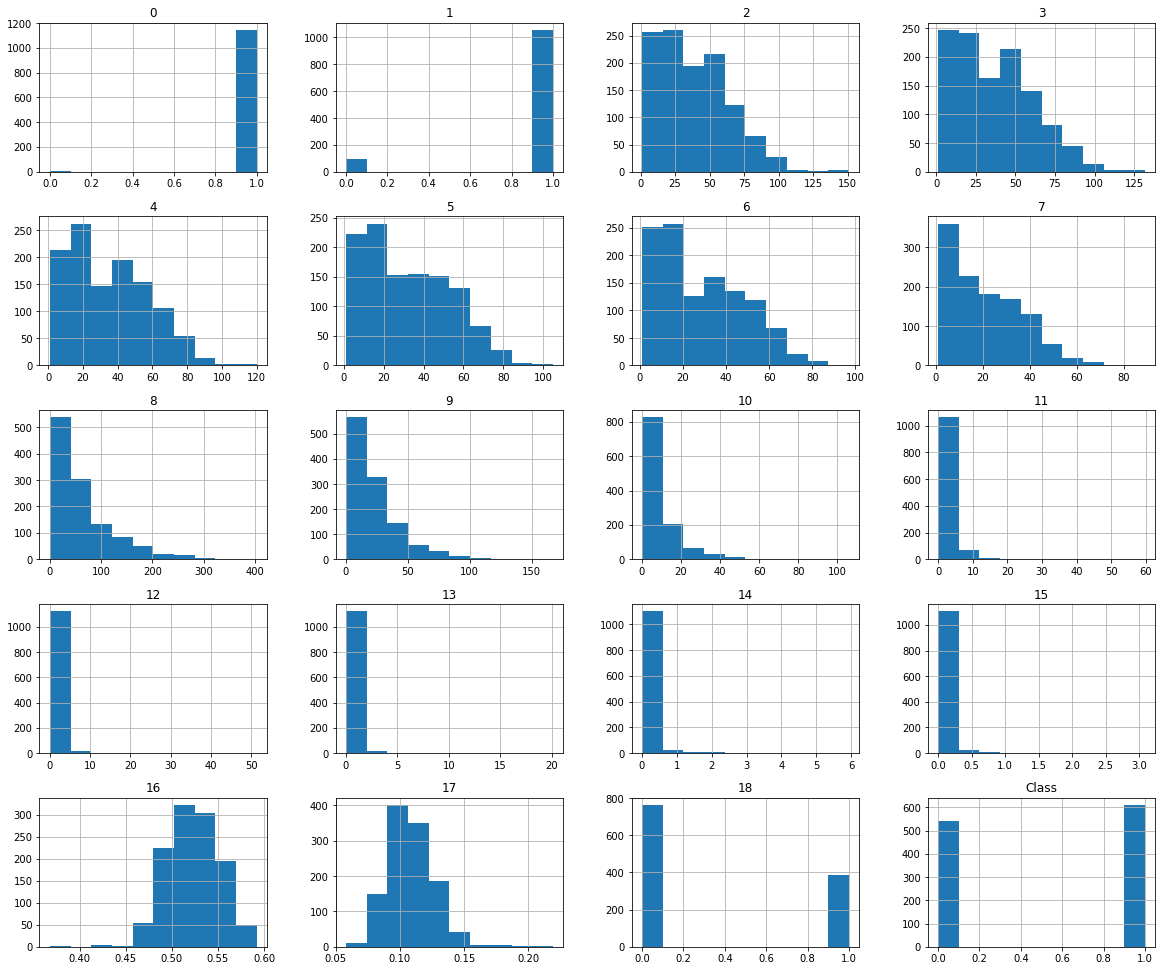

In [620]:
data.hist(figsize=(20,17));

<AxesSubplot:xlabel='1', ylabel='count'>

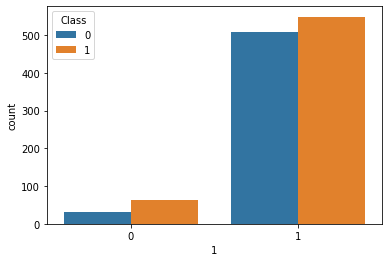

In [621]:
sns.countplot(x='1',hue='Class',data=data)

#### According to this plot, the accuracy of pre-screening is too low. So we will drop the '1' column.

<AxesSubplot:xlabel='18', ylabel='count'>

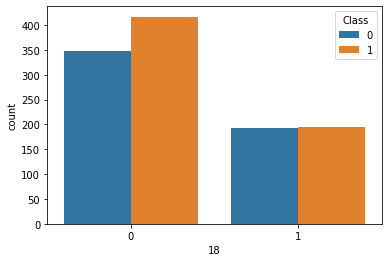

In [622]:
sns.countplot(x='18',hue='Class',data=data)

#### The accuracy of AM/FM-based classification is too low. The '18' column will be dropped.

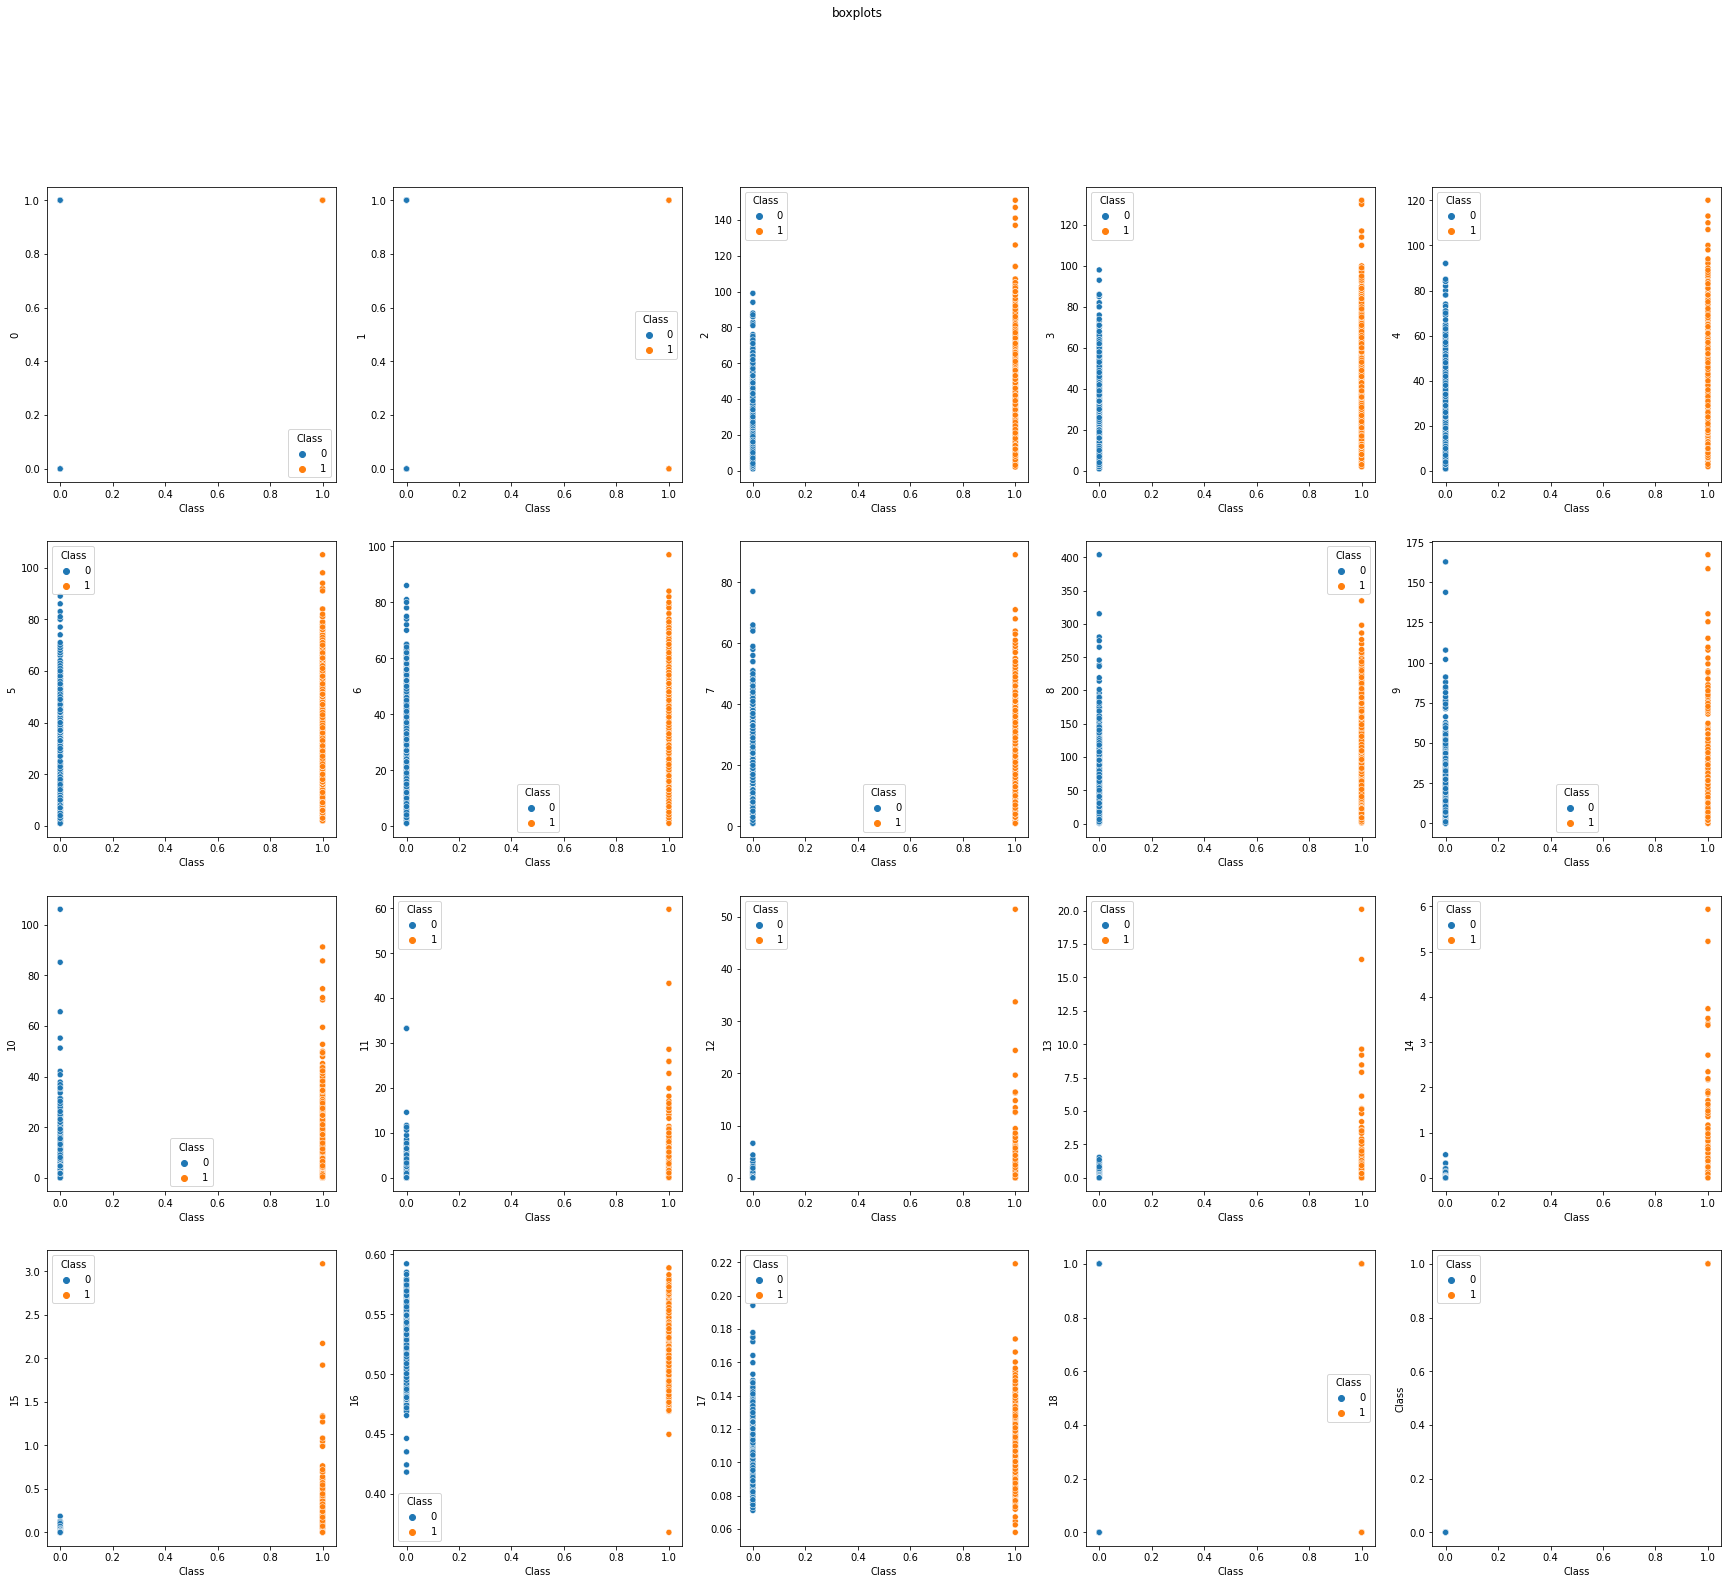

In [623]:
fig, axes = plt.subplots(4, 5, figsize=(30,25))
fig.suptitle('boxplots')
feature=0
for row in range(4):
    for col in range(5):
        sns.scatterplot(ax=axes[row, col], data=data, x='Class', y=data.columns[feature], hue='Class')
        feature +=1

In [624]:
keys = [df.columns[i] for i in range(1, 17)]
values = [(df.groupby(['Class'])[df.columns[i]].median()[1] - df.groupby(['Class'])[df.columns[i]].median()[0]) / (df.groupby(['Class'])[df.columns[i]].median()[0] + 0.001) * 100  for i in range(1,17)]
median_diff = dict(zip(keys, values))
median_diff

{'2': 75.99696012159514,
 '3': 67.99728010879565,
 '4': 62.497395941835755,
 '5': 54.542975319303665,
 '6': 44.99775011249437,
 '7': 33.33111125924938,
 '8': -16.366389142596432,
 '9': -20.022315758732265,
 '10': -5.357192183215617,
 '11': 31.695735027326982,
 '12': 298.16153846153844,
 '13': 393.0,
 '14': 0.0,
 '15': 0.0,
 '16': 0.07050793381223186,
 '17': -1.5640860016609655}

#### According to the scaterplots and median_diff of two classe(0,1), it seems that the most predictive features are {'2' , '3' , '4', '5', '6' , '7', '8', '9', '10' , '11', '12', '13'}

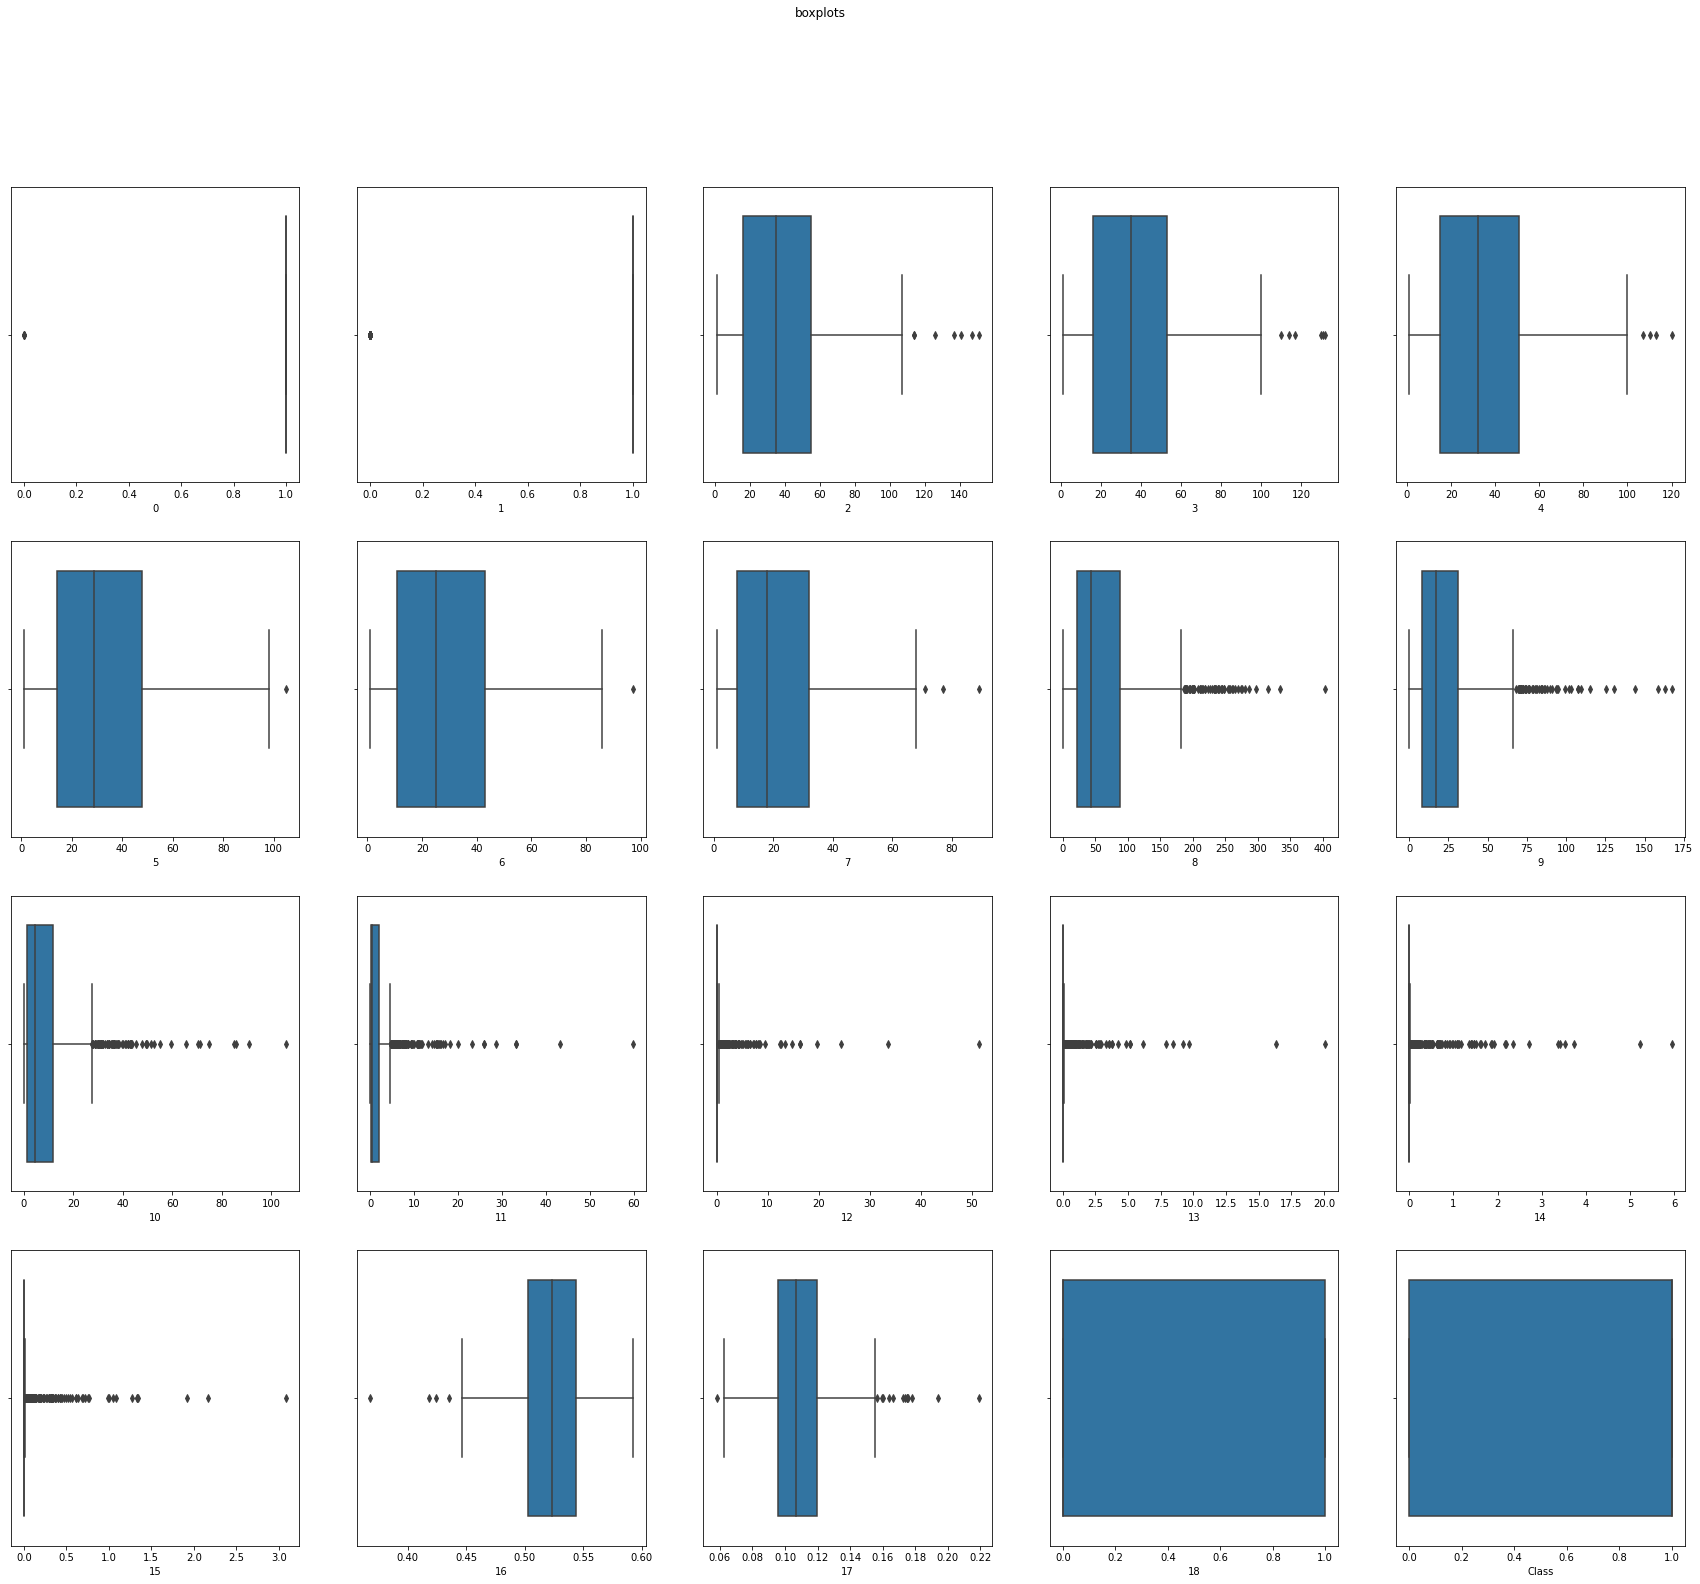

In [625]:
fig, axes = plt.subplots(4, 5, figsize=(30,25))
fig.suptitle('boxplots')
feature=0
for row in range(4):
    for col in range(5):
        sns.boxplot(ax=axes[row, col], data=data, x=data.columns[feature])
        feature +=1

In [626]:
df = data.copy()

In [627]:
#outliers of quality(bad quality)
df[df['0'] == 0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
id,,,,,,,,,,,,,,,,,,,,
126,0,1,16,15,15,14,12,9,1.585571,0.064843,0.004632,0.0,0.0,0.0,0.0,0.0,0.492522,0.125055,1,0
570,0,1,14,13,13,9,6,5,0.349274,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.567809,0.175413,1,0
695,0,1,30,30,30,25,24,14,1.259315,0.003098,0.001549,0.0,0.0,0.0,0.0,0.0,0.539694,0.123918,0,0
901,0,1,32,31,31,29,27,24,1.362503,0.050126,0.000000,0.0,0.0,0.0,0.0,0.0,0.534504,0.091137,1,0


In [628]:
#dropping low quality images
df.drop(df[(df['0'] == 0)].index, axis=0, inplace=True)
df.shape

(1147, 20)

In [629]:
#dropping low accuracy features
df.drop(columns=['1', '18'], axis=0, inplace=True)
df.shape

(1147, 18)

In [630]:
X = df.drop(columns=['Class'], axis=1)
y = df.Class

In [631]:
#keeping just probable predictive features
X = df.drop(columns=['14', '15', '16', '17', 'Class'], axis=1)
y = df.Class

In [632]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

model = RandomForestClassifier()
model.fit(X_train,y_train)

RFC_preds = model.predict(X_test)
print(classification_report(RFC_preds, y_test))

              precision    recall  f1-score   support

           0       0.68      0.63      0.65       233
           1       0.64      0.70      0.67       226

    accuracy                           0.66       459
   macro avg       0.66      0.66      0.66       459
weighted avg       0.66      0.66      0.66       459



#### The recall metric of RF for class 1: 0.7

In [633]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [634]:
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

LR_preds = model.predict(X_test_scaled)
print(classification_report(LR_preds, y_test))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71       262
           1       0.62      0.77      0.69       197

    accuracy                           0.70       459
   macro avg       0.71      0.71      0.70       459
weighted avg       0.72      0.70      0.70       459



####  The recall metric of LR model for class 1: 0.77

In [635]:
model = SVC()
model.fit(X_train_scaled,y_train)

SVC_preds = model.predict(X_test_scaled)
print(classification_report(SVC_preds, y_test))

              precision    recall  f1-score   support

           0       0.86      0.65      0.74       284
           1       0.59      0.83      0.69       175

    accuracy                           0.72       459
   macro avg       0.73      0.74      0.71       459
weighted avg       0.76      0.72      0.72       459



#### The recal metric of SVC model for calss 1: 0.83

#### SVC provides the highest recall for class 1


# Hyperparameter Tuning

In [668]:
model = SVC(kernel='poly',  C=7)
model.fit(X_train_scaled,y_train)

SVC_preds = model.predict(X_test_scaled)
print(classification_report(SVC_preds, y_test))

              precision    recall  f1-score   support

           0       0.92      0.60      0.72       331
           1       0.45      0.87      0.60       128

    accuracy                           0.67       459
   macro avg       0.69      0.73      0.66       459
weighted avg       0.79      0.67      0.69       459



#### 87%